In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

%matplotlib inline

In [38]:
outlierdata = pd.read_csv('Group017_outlier_data.csv')

In [39]:
outlierdata.head()

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDA04354,2018-07-15,14:25:21,Lunch,BK,"[('Salad', 1), ('Fries', 7)]",101.2,-37.817296,144.987975,0,5.918,14.068446
1,ORDB02723,2018-01-23,08:40:33,Breakfast,TP,"[('Pancake', 4), ('Cereal', 4)]",181.0,-37.817335,144.962208,0,7.904,11.053223
2,ORDB04984,2018-03-11,10:11:49,Breakfast,TP,"[('Eggs', 9), ('Coffee', 9), ('Cereal', 5), ('...",419.0,-37.806582,144.962905,0,9.007,13.251034
3,ORDJ03820,2018-02-27,09:51:32,Breakfast,TP,"[('Pancake', 4), ('Eggs', 8), ('Cereal', 5), (...",453.0,-37.809812,144.976242,0,9.231,17.764767
4,ORDZ06038,2018-03-08,10:11:49,Breakfast,NS,"[('Cereal', 9), ('Eggs', 7), ('Pancake', 4)]",440.0,-37.808184,144.973174,0,7.119,12.297550


#### Working with order price 

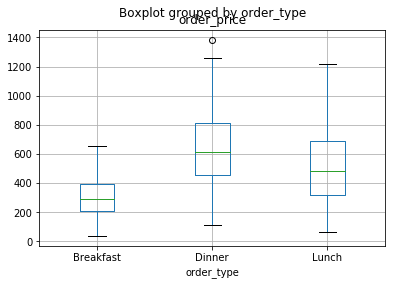

In [40]:
outlierdata.boxplot(column = 'order_price', by = 'order_type')

In [41]:
outlierdata.describe()

,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,476.232500,-37.812472,144.969156,0.080000,8.620148,13.464905
std,256.750656,0.007499,0.022242,0.271565,1.753597,3.420724
min,36.000000,-37.836908,144.894564,0.000000,3.234000,3.539279
25%,274.000000,-37.818846,144.953760,0.000000,7.663750,12.094526
50%,438.900000,-37.812918,144.966153,0.000000,8.624500,13.693176
75%,631.212500,-37.806340,144.985216,0.000000,9.756250,15.437806
max,1384.500000,-37.788784,145.019314,1.000000,16.625000,26.588101


In [45]:
for x in (outlierdata[outlierdata.order_price == 1384.5].order_items):
    print(x)

[('Shrimp', 8), ('Pasta', 7), ('Salmon', 10), ('Fish&Chips', 10)]


In [46]:
outlierdata1 = outlierdata[outlierdata.order_price != 1384.5]

In [49]:
outlierdata1.order_price.max()

1259.5

In [50]:
for x in (outlierdata[outlierdata.order_price == 1259.5].order_items):
    print(x)

[('Salmon', 10), ('Shrimp', 8), ('Fish&Chips', 8), ('Pasta', 5)]


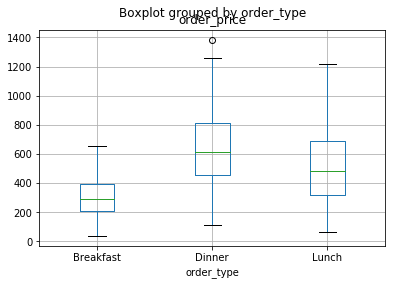

In [51]:
outlierdata.boxplot(column = 'order_price', by = 'order_type')

##### Just an unusually large order has been placed for $1384.5

#### Working with distance_to_customer_KM

In [35]:
outlierdata.distance_to_customer_KM.describe()

count    499.000000
mean       8.620349
std        1.755351
min        3.234000
25%        7.663500
50%        8.625000
75%        9.758500
max       16.625000
Name: distance_to_customer_KM, dtype: float64

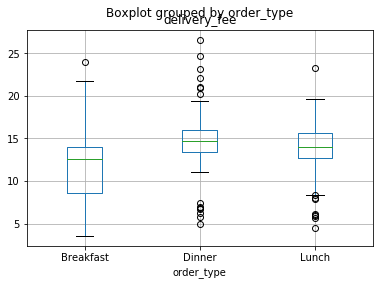

In [61]:
outlierdata.boxplot(column = 'delivery_fee', by = 'order_type')

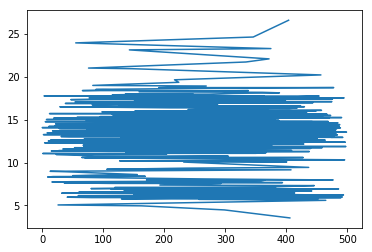

In [55]:
plt.plot(outlierdata.sort_values(['delivery_fee'])['delivery_fee'])

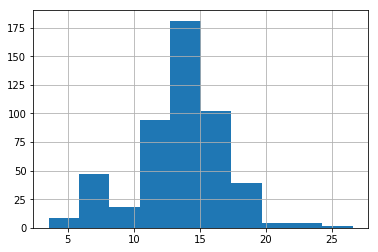

In [58]:
outlierdata.sort_values(['delivery_fee']).delivery_fee.hist()

In [67]:

date=list(outlierdata['date'])
day=[]
for item in date:
    if datetime.strptime(item, '%Y-%m-%d').strftime('%A') in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']:
        day.append(0)
    else:
        day.append(1)
        
outlierdata['weekday/weekend']=day

In [71]:
time=list(outlierdata['time'])
datetime.strptime(time[0], '%H:%M:%S').time()
if datetime.strptime(time[0], '%H:%M:%S').time()> datetime.strptime("08:00:00", '%H:%M:%S').time() and datetime.strptime(time[0], '%H:%M:%S').time()<=datetime.strptime("12:00:00", '%H:%M:%S').time():
    print(True)
else:
    print(False)

def times(timestring):
    return datetime.strptime(timestring, '%H:%M:%S').time()

False


In [72]:
tod=[]
for item in time:
    if times(item)>= times("08:00:00") and times(item)<=times("12:00:00"):
        tod.append(0)
    elif times(item)> times("12:00:00") and times(item)<=times("16:00:00"):
        tod.append(1)
    elif times(item)> times("16:00:00") and times(item)<=times("20:00:00"):
        tod.append(2)
    else:
        print("ERROR")
        break

In [73]:
outlierdata['TimeOfDay']=tod

In [77]:
outlierdata.distance_to_customer_KM.describe()

count    500.000000
mean       8.620148
std        1.753597
min        3.234000
25%        7.663750
50%        8.624500
75%        9.756250
max       16.625000
Name: distance_to_customer_KM, dtype: float64

In [81]:
def segregate_distance(row):
    if(row.distance_to_customer_KM<5):
        return 0
    elif(row.distance_to_customer_KM>5 and row.distance_to_customer_KM <10):
        return 1
    elif(row.distance_to_customer_KM>10 and row.distance_to_customer_KM <15):
        return 2
    elif(row.distance_to_customer_KM>15):
        return 3
    else: 
        return -1

In [82]:
outlierdata['segregated_distance'] = outlierdata.apply(segregate_distance, axis = 1)

In [85]:
outlierdata.head()

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,weekday/weekend,TimeOfDay,segregated_distance
0,ORDA04354,2018-07-15,14:25:21,Lunch,BK,"[('Salad', 1), ('Fries', 7)]",101.2,-37.817296,144.987975,0,5.918,14.068446,1,1,1
1,ORDB02723,2018-01-23,08:40:33,Breakfast,TP,"[('Pancake', 4), ('Cereal', 4)]",181.0,-37.817335,144.962208,0,7.904,11.053223,0,0,1
2,ORDB04984,2018-03-11,10:11:49,Breakfast,TP,"[('Eggs', 9), ('Coffee', 9), ('Cereal', 5), ('...",419.0,-37.806582,144.962905,0,9.007,13.251034,1,0,1
3,ORDJ03820,2018-02-27,09:51:32,Breakfast,TP,"[('Pancake', 4), ('Eggs', 8), ('Cereal', 5), (...",453.0,-37.809812,144.976242,0,9.231,17.764767,0,0,1
4,ORDZ06038,2018-03-08,10:11:49,Breakfast,NS,"[('Cereal', 9), ('Eggs', 7), ('Pancake', 4)]",440.0,-37.808184,144.973174,0,7.119,12.297550,0,0,1


In [114]:
q1= outlierdata.groupby(['weekday/weekend','TimeOfDay','segregated_distance','customerHasloyalty?']).quantile(0.25)

In [115]:
q3= outlierdata.groupby(['weekday/weekend','TimeOfDay','segregated_distance','customerHasloyalty?']).quantile(0.75)

In [116]:
iqr = q3-q1

In [118]:
threshould = 1.5 * iqr

In [119]:
threshould

0.75                                                               customer_lat  \
weekday/weekend TimeOfDay segregated_distance customerHasloyalty?                 
0               0         0                   0                        0.000608   
                          1                   0                        0.013738   
                                              1                        0.011307   
                          2                   0                        0.020231   
                                              1                        0.015104   
                1         0                   0                        0.017673   
                          1                   0                        0.020825   
                          2                   0                        0.019764   
                2         0                   0                        0.005362   
                          1                   0                        0.019420   
                          2                   0                        0.015534   
                          3                   0                        0.000000   
1               0         0                   0                        0.000000   
                          1                   0                        0.016550   
                                              1                        0.016686   
                          2                   0                        0.016995   
                                              1                        0.003092   
                1         1                   0                        0.014431   
                          2                   0                        0.021733   
                2         1                   0                        0.018063   
                          2                   0                        0.017847   

0.75                                                               customer_lon  \
weekday/weekend TimeOfDay segregated_distance customerHasloyalty?                 
0               0         0                   0                        0.001780   
                          1                   0                        0.034833   
                                              1                        0.013137   
                          2                   0                        0.012586   
                                              1                        0.113514   
                1         0                   0                        0.007654   
                          1                   0                        0.035894   
                          2                   0                        0.110233   
                2         0                   0                        0.006384   
                          1                   0                        0.043704   
                          2                   0                        0.082773   
                          3                   0                        0.000000   
1               0         0                   0                        0.000000   
                          1                   0                        0.028816   
                                              1                        0.063221   
                          2                   0                        0.026264   
                                              1                        0.047525   
                1         1                   0                        0.023124   
                          2                   0                        0.020608   
                2         1                   0                        0.044031   
                          2                   0                        0.043073   

0.75                                                               delivery_fee  \
weekday/weekend TimeOfDay segregated_distance customerHasloyalty?                 
0             

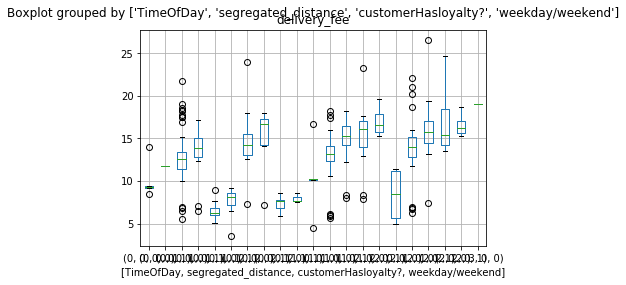

In [112]:
outlierdata.boxplot(column = 'delivery_fee',by = ['TimeOfDay','segregated_distance', 'customerHasloyalty?' ,'weekday/weekend' ] )

In [95]:
boxplot = pd.DataFrame()

In [104]:
boxplot = outlierdata[['delivery_fee', 'TimeOfDay','segregated_distance' ,'customerHasloyalty?']]

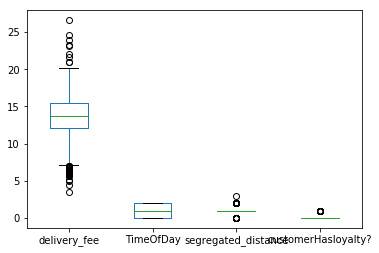

In [109]:
boxplot.plot(kind='box', by = 'TimeOfDay')